In [1]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/vksk0/IdeaProjects/AI를 활용한 온도예측기술에 기반한 건설현장 매스콘트리트 양생관리시스템 구축/web/biel_train.csv')
valid = pd.read_csv('biel_validation.csv')
valid = valid[0:280]

# y_temp 결측치 제거
df = df.dropna()

# 'shape'가 'sw1'인 데이터만 df에 저장
df = df[df['shape'] == 'sw1']

# 'shape' 열 삭제
df = df.drop(['shape'], axis=1)
valid = valid.drop(['shape'], axis=1)

# one-hot encoding (shape, location)
df = pd.get_dummies(df)
columns = list(df.columns.values)
columns.remove('y_temp')

valid = pd.get_dummies(valid)
validation = valid[:]
validation = validation.drop(['y_temp', 'location_bottom'], axis=1)
validation['location_top'] = 0
validation['location_center'] = 0
validation['location_side1'] = 0
validation['location_side2'] = 0
validation['location_bottom'] = valid['location_bottom']
validation
v_columns = list(validation.columns.values)

# 'y_temp' 데이터타입 int로 변환(float -> int)
# df = df.astype({'y_temp':'int'})

# 학습과 데이터셋 지정
X_train = df[columns]
y_train = df[['y_temp']]
X_test = validation[v_columns]

print(v_columns)
print(X_test)

['max_tem', 'tem_rate', 'height', 'length', 'width', 'W_top', 'W_side', 'W_bottom', 'tem_initial', 'tem_out', 'days', 'location_bottom', 'location_center', 'location_side1', 'location_side2', 'location_top']
     max_tem  tem_rate  height  length  width  W_top  W_side  W_bottom  \
0       48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
1       48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
2       48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
3       48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
4       48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
..       ...       ...     ...     ...    ...    ...     ...       ...   
275     48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
276     48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
277     48.8      0.73     4.4    20.0    2.0   13.0    14.0       2.7   
278     48.8      0.73     4.4    20.0    2.0   13.0

In [11]:
valid = pd.read_csv('biel_validation.csv')
valid[0:280]

,shape,max_tem,tem_rate,height,length,width,W_top,W_side,W_bottom,tem_initial,tem_out,days,location,y_temp
0,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.1,top,NaN
1,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.2,top,NaN
2,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.3,top,NaN
3,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.4,top,NaN
4,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.5,top,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.6,top,NaN
276,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.7,top,NaN
277,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.8,top,NaN
278,sw1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.9,top,NaN


## model 생성

In [12]:
model = XGBRegressor(n_estimators=400) # 트리 개수 400개로 모델 생성
model.fit(X_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost로 feature importance 확인

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

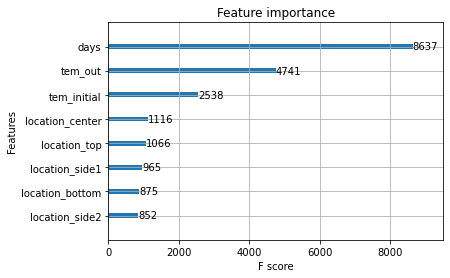

In [13]:
plot_importance(model)

## y_temp 예측

In [14]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test) # 예측치

In [15]:
validation['y_temp'] = y_pred
print(y_pred[1])

17.127972


In [7]:
validation

,max_tem,tem_rate,height,length,width,W_top,W_side,W_bottom,tem_initial,tem_out,days,location_bottom,location_center,location_side1,location_side2,location_top,y_temp
0,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.1,0,0,0,0,1,16.342882
1,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.2,0,0,0,0,1,17.127972
2,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.3,0,0,0,0,1,17.819017
3,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.4,0,0,0,0,1,18.541906
4,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,0.5,0,0,0,0,1,19.151220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.6,0,0,0,0,1,-4.412403
276,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.7,0,0,0,0,1,-4.412403
277,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.8,0,0,0,0,1,-4.412403
278,48.8,0.73,4.4,20.0,2.0,13.0,14.0,2.7,15.0,-5.0,27.9,0,0,0,0,1,-4.412403


In [8]:
validation.to_excel('DecisionTree_sw1_validation_result.xlsx')

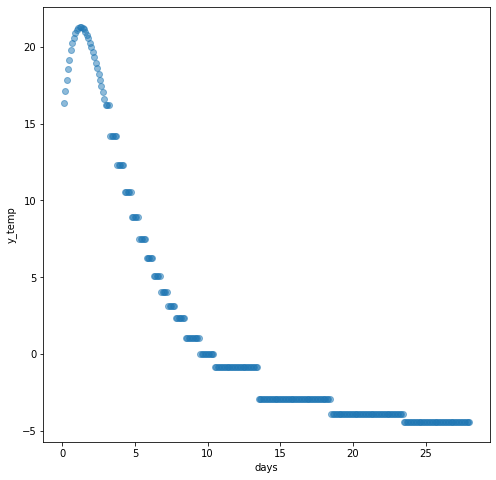

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(validation['days'], validation['y_temp'], alpha=0.5)
plt.xlabel('days')
plt.ylabel('y_temp')
plt.show()

In [10]:
df_15 = df[df['tem_initial'] == 15]
df_15 = df_15[df_15['tem_out'] == -5]
df_15 = df_15[df_15['location_top'] == 1]

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(validation['days'], validation['y_temp'], c='red', alpha=0.5, label='fitted_data')
plt.scatter(df_15['days'], df_15['y_temp'], c='blue', alpha=0.5, label='real_data')
plt.ylabel('temperature')
plt.xlabel('days')
plt.legend(loc='best')
plt.show()
aa = [1,2,3,4]
print(aa)

NameError: name 'df_15' is not defined

In [12]:
from pandas import Series, DataFrame

a = '123'
b = '234'
c = '31'
d = '321'

raw_data = {'shape' : [float(a)], 'max_tem' : [float(b)]}

ff = DataFrame(raw_data)

ff

,shape,max_tem
0,123.0,234.0
